In [1]:
import pandas as pd
import sys
sys.path.append("..")
from randomforest import random_forest_CV
from tools import feature_selection
from tools import data_parser as dp
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bert_data = "../data/combined_bert_df.csv"
df = pd.read_csv(bert_data)

light, heavy, temp = dp.data_extract('../data/combined_datasets.csv')

X = df
y = temp

In [3]:
def rfe_plot(X, y):

    # Create a non-linear model (Random Forest Regressor)
    rf = RandomForestRegressor()

    # Create a range of values for n_features_to_select to try
    n_features_range = range(10, 110, 10 )

    # Create an empty list to store the cross-validation scores for each value of n_features_to_select
    cv_scores = []

    # Loop over the values of n_features_to_select
    for n_features in n_features_range:
        # Create an RFE object with the non-linear model and the current value of n_features_to_select
        rfe = RFE(estimator=rf, n_features_to_select=n_features)

        # Perform cross-validation and get the mean score across folds
        score = cross_val_score(rfe, X, y, cv=5).mean()

        # Append the score to the list of scores
        cv_scores.append(score)

    # Plot the cross-validation scores as a function of n_features_to_select
    plt.plot(n_features_range, cv_scores)
    plt.xlabel('Number of features selected')
    plt.ylabel('Cross-validation score')
    return plt.show()

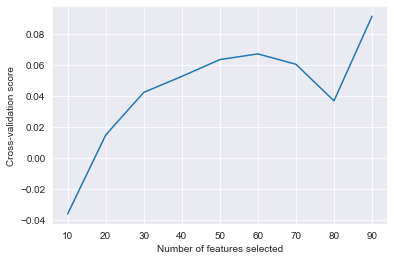

In [4]:
rfe_plot(X, y)

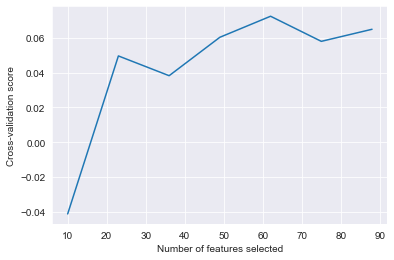

CPU times: total: 2h 4min 11s
Wall time: 3h 43min 33s


In [5]:
%%time
rfe_plot(X, y)

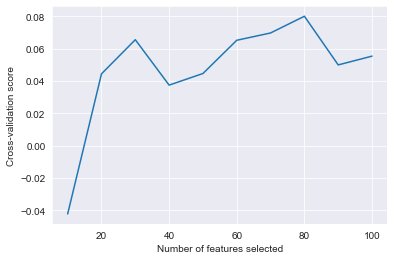

CPU times: total: 3h 13min 22s
Wall time: 5h 36min 30s


In [4]:
%%time
rfe_plot(X, y)

In [4]:
sns.set_style(style='white')

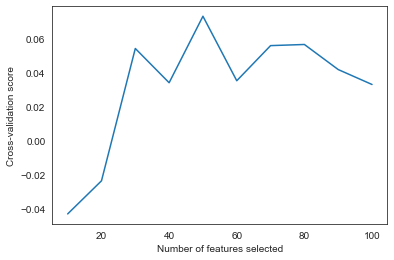

CPU times: total: 3h 11min 47s
Wall time: 5h 16min 32s


In [5]:
%%time
rfe_plot(X, y)

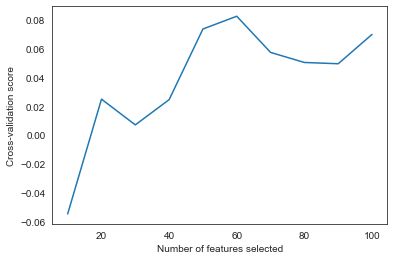

CPU times: total: 3h 14min 27s
Wall time: 5h 14min 47s


In [6]:
%%time
rfe_plot(X, y)